# Ridge Regularization with multiple feature dataset practise

I will apply L2 regularization on the student performance dataset I have been working on, to see how it works in a many-feature scenario. The loss function for a Multiple Linear Regression model with L2 regularization with m features looks as follows: 

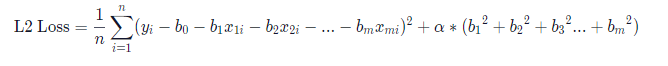

I am going to examine this by reapplying a multiple linear regression model to the student performance dataset I was looking at earlier on ine — only this time, I am going to do this with L2 regularization. 

The original unregularized coefficients look as shown in the image below:

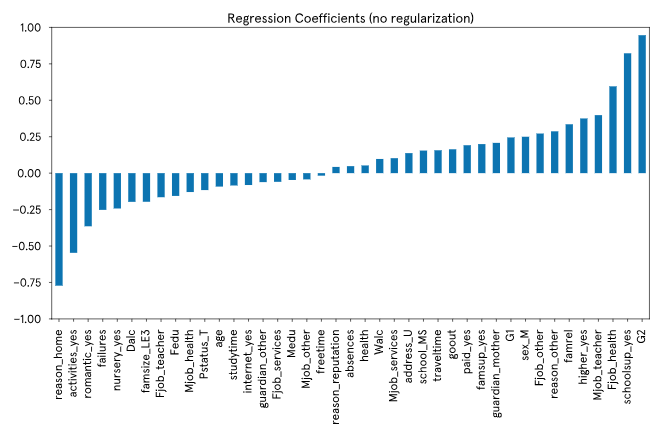

* too many features possibly (from the number of columns in the DataFrame)
* testing error is higher than training error (by looking at the MSE)
* highly negatively correlated features (inferred from the plot of the coefficients)


Practise 1, 2, 3: 

Similar to the L1 practise, I’ve loaded a file here containing the analysis I did earlier on. I can implement Ridge regularization for this dataset using scikit-learn by importing the Ridge module within linear_models. I am setting s by way of setting alpha to 100 - the scikit-learn default is 1. 

I am going to evaluate the training and test error and the error just as I did last time. and plot the coefficient 

Following the syntax for training error, calculate the testing error using the following steps:

set the variable l2_pred_test equal to the result of applying the model to X_test
set the variable l2_mse_test equal to the Mean Squared Error of the test data
print l2_mse_test

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import helpers

df = pd.read_csv("./student_math.csv")
y = df['Final_Grade']
X = df.drop(columns = ['Final_Grade'])

# 1. Train-test split and fitting an l2-regularized regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
ridge = Ridge(alpha = 100)
ridge.fit(X_train, y_train)

#Training error
l2_pred_train = ridge.predict(X_train)
l2_mse_train = np.mean((l2_pred_train - y_train)**2)
print("Ridge (L2) Training Error: ", l2_mse_train)

# 2. Calculate testing error
l2_pred_test = ridge.predict(X_test)
l2_mse_test = np.mean((l2_pred_test - y_test)**2)
print("Ridge (L2) Testing Error: ", l2_mse_test)


# 3. Plotting the Coefficients
predictors = X.columns
coef = pd.Series(ridge.coef_,predictors).sort_values()
plt.figure(figsize = (12,8))
plt.ylim(-1.0,1.0)
coef.plot(kind='bar', title='Regression Coefficients with Lasso (L1) Regularization')
plt.show()

Answer: 

Ridge (L2) Training Error:  2.8476069326177864
Ridge (L2) Testing Error:  4.35738634031129

The training and test Mean Squared Errors obtained from implementing the regression without regularization were 2.627 and 4.987 (rounded to three decimals!) Here, I can see how the training error went up but the test error went down, which makes sense as the model is performing slightly better on test data at the cost of performing slightly worse on training data.

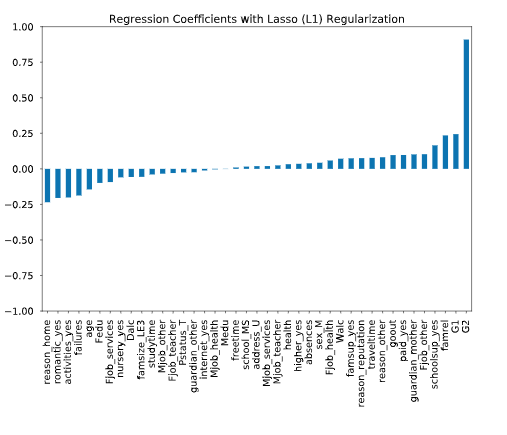

I can see how L2 regularization shrinks the coefficients as well, and while there are some coefficients that are very small, no coefficient is set to zero. The amount by which the feature coefficients get shrunk is related to the alpha I choose in implementing regularization. 
